# 🧠 Análisis Exploratorio de Datos (EDA) - Predicción de Ictus

Este notebook contiene un análisis exploratorio completo del dataset de predicción de ictus cerebral.

## Objetivos:
- ✅ Explorar la estructura del dataset
- ✅ Identificar valores nulos y datos faltantes
- ✅ Analizar la distribución de variables
- ✅ Detectar desbalanceo de clases
- ✅ Visualizar correlaciones
- ✅ Preparar datos para modelado con ML y CNN

## 1️⃣ Importar Librerías Necesarias

In [1]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')

# Configuración de visualización
%matplotlib inline
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Librerías importadas correctamente
Pandas version: 2.3.3
NumPy version: 2.3.4


## 2️⃣ Cargar y Explorar el Dataset

In [2]:
# Cargar el dataset
df = pd.read_csv('stroke_dataset.csv')

print("=" * 80)
print("📊 INFORMACIÓN BÁSICA DEL DATASET")
print("=" * 80)
print(f"\n✅ Dataset cargado exitosamente!")
print(f"📏 Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\n📋 Columnas del dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

print("\n" + "=" * 80)
print("👀 PRIMERAS 10 FILAS DEL DATASET")
print("=" * 80)
df.head(10)

📊 INFORMACIÓN BÁSICA DEL DATASET

✅ Dataset cargado exitosamente!
📏 Dimensiones: 4981 filas x 11 columnas

📋 Columnas del dataset:
   1. gender
   2. age
   3. hypertension
   4. heart_disease
   5. ever_married
   6. work_type
   7. Residence_type
   8. avg_glucose_level
   9. bmi
   10. smoking_status
   11. stroke

👀 PRIMERAS 10 FILAS DEL DATASET


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [3]:
# Información detallada del dataset
print("=" * 80)
print("🔍 INFORMACIÓN DETALLADA DE TIPOS DE DATOS")
print("=" * 80)
df.info()

print("\n" + "=" * 80)
print("📊 TIPOS DE DATOS Y MEMORIA")
print("=" * 80)
print(df.dtypes)

🔍 INFORMACIÓN DETALLADA DE TIPOS DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB

📊 TIPOS DE DATOS Y MEMORIA
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married       

## 3️⃣ Control de Calidad de Datos - Valores Nulos y Duplicados

🔍 ANÁLISIS DE VALORES NULOS

✅ ¡Excelente! No hay valores nulos en el dataset


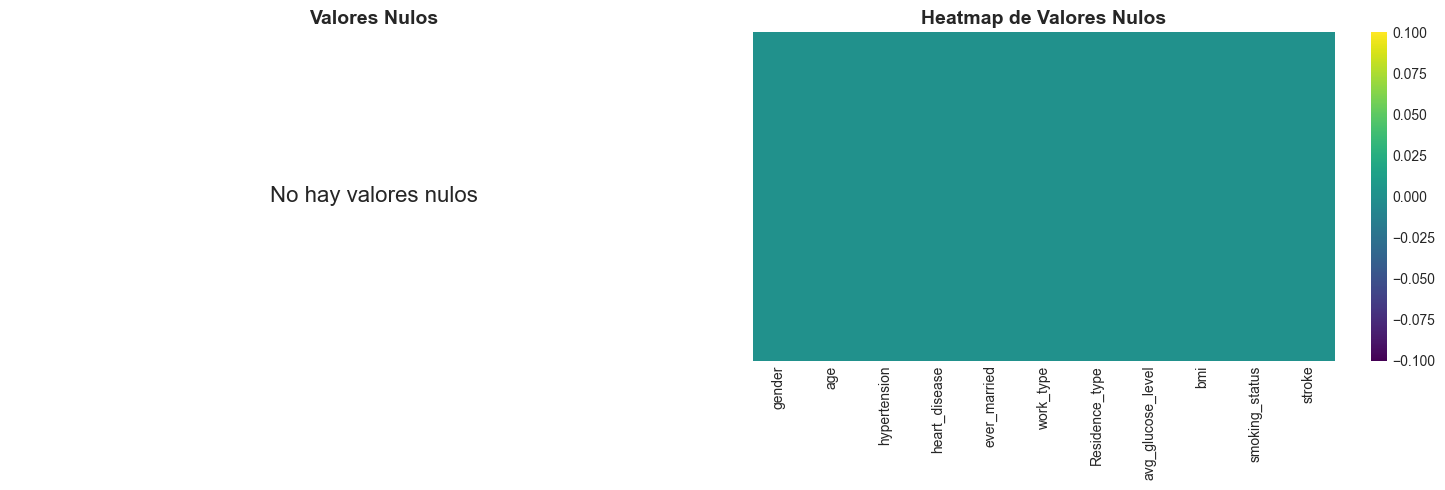


🔄 ANÁLISIS DE DUPLICADOS

📊 Filas duplicadas: 0
✅ No hay filas duplicadas


In [4]:
# Análisis de valores nulos
print("=" * 80)
print("🔍 ANÁLISIS DE VALORES NULOS")
print("=" * 80)

missing_data = pd.DataFrame({
    'Columna': df.columns,
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / len(df) * 100).round(2)
})

missing_data = missing_data[missing_data['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)

if len(missing_data) == 0:
    print("\n✅ ¡Excelente! No hay valores nulos en el dataset")
else:
    print("\n⚠️ Se encontraron valores nulos:\n")
    print(missing_data.to_string(index=False))

# Visualización de valores nulos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras de valores nulos
if len(missing_data) > 0:
    axes[0].bar(missing_data['Columna'], missing_data['Valores Nulos'], color='coral')
    axes[0].set_title('Cantidad de Valores Nulos por Columna', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Columnas')
    axes[0].set_ylabel('Cantidad de Nulos')
    axes[0].tick_params(axis='x', rotation=45)
else:
    axes[0].text(0.5, 0.5, 'No hay valores nulos', ha='center', va='center', fontsize=16)
    axes[0].set_title('Valores Nulos', fontsize=14, fontweight='bold')
    axes[0].axis('off')

# Heatmap de valores nulos
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=axes[1])
axes[1].set_title('Heatmap de Valores Nulos', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("🔄 ANÁLISIS DE DUPLICADOS")
print("=" * 80)
duplicates = df.duplicated().sum()
print(f"\n📊 Filas duplicadas: {duplicates}")
if duplicates > 0:
    print(f"⚠️ Porcentaje de duplicados: {(duplicates/len(df)*100):.2f}%")
else:
    print("✅ No hay filas duplicadas")

## 4️⃣ Resumen Estadístico de las Variables

In [5]:
# Resumen estadístico de variables numéricas
print("=" * 80)
print("📊 RESUMEN ESTADÍSTICO - VARIABLES NUMÉRICAS")
print("=" * 80)
print(df.describe().round(2))

print("\n" + "=" * 80)
print("📊 RESUMEN ESTADÍSTICO - VARIABLES CATEGÓRICAS")
print("=" * 80)

# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    print(f"\n🔹 {col.upper()}:")
    print(df[col].value_counts())
    print(f"   Valores únicos: {df[col].nunique()}")

📊 RESUMEN ESTADÍSTICO - VARIABLES NUMÉRICAS
           age  hypertension  heart_disease  avg_glucose_level      bmi  \
count  4981.00       4981.00        4981.00            4981.00  4981.00   
mean     43.42          0.10           0.06             105.94    28.50   
std      22.66          0.29           0.23              45.08     6.79   
min       0.08          0.00           0.00              55.12    14.00   
25%      25.00          0.00           0.00              77.23    23.70   
50%      45.00          0.00           0.00              91.85    28.10   
75%      61.00          0.00           0.00             113.86    32.60   
max      82.00          1.00           1.00             271.74    48.90   

        stroke  
count  4981.00  
mean      0.05  
std       0.22  
min       0.00  
25%       0.00  
50%       0.00  
75%       0.00  
max       1.00  

📊 RESUMEN ESTADÍSTICO - VARIABLES CATEGÓRICAS

🔹 GENDER:
gender
Female    2907
Male      2074
Name: count, dtype: int64
   Val

## 5️⃣ Distribución de la Variable Objetivo (Stroke)

🎯 ANÁLISIS DE LA VARIABLE OBJETIVO: STROKE

📊 Distribución de casos:
   Sin Ictus (0): 4733 (95.02%)
   Con Ictus (1): 248 (4.98%)

⚖️ Ratio de desbalanceo: 19.08:1
⚠️ El dataset está DESBALANCEADO


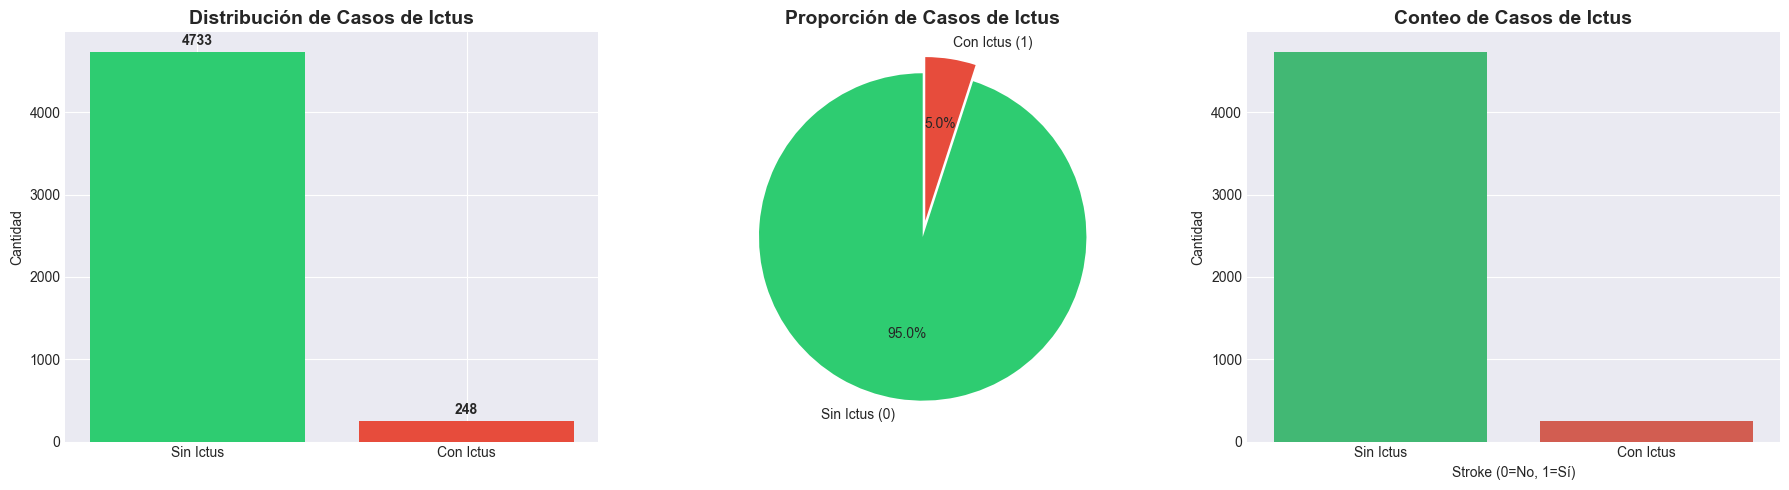

In [6]:
# Análisis de la variable objetivo
print("=" * 80)
print("🎯 ANÁLISIS DE LA VARIABLE OBJETIVO: STROKE")
print("=" * 80)

stroke_counts = df['stroke'].value_counts()
stroke_percentages = df['stroke'].value_counts(normalize=True) * 100

print(f"\n📊 Distribución de casos:")
print(f"   Sin Ictus (0): {stroke_counts[0]} ({stroke_percentages[0]:.2f}%)")
print(f"   Con Ictus (1): {stroke_counts[1]} ({stroke_percentages[1]:.2f}%)")

# Calcular el ratio de desbalanceo
imbalance_ratio = stroke_counts[0] / stroke_counts[1]
print(f"\n⚖️ Ratio de desbalanceo: {imbalance_ratio:.2f}:1")
print(f"⚠️ El dataset está {'DESBALANCEADO' if imbalance_ratio > 3 else 'BALANCEADO'}")

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico de barras
axes[0].bar(['Sin Ictus', 'Con Ictus'], stroke_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribución de Casos de Ictus', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cantidad')
for i, v in enumerate(stroke_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(stroke_counts.values, labels=['Sin Ictus (0)', 'Con Ictus (1)'],
            autopct='%1.1f%%', colors=colors, startangle=90, explode=(0, 0.1))
axes[1].set_title('Proporción de Casos de Ictus', fontsize=14, fontweight='bold')

# Gráfico de conteo con seaborn
sns.countplot(data=df, x='stroke', palette=['#2ecc71', '#e74c3c'], ax=axes[2])
axes[2].set_title('Conteo de Casos de Ictus', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Stroke (0=No, 1=Sí)')
axes[2].set_ylabel('Cantidad')
axes[2].set_xticklabels(['Sin Ictus', 'Con Ictus'])

plt.tight_layout()
plt.show()

## 6️⃣ Análisis de Variables Categóricas

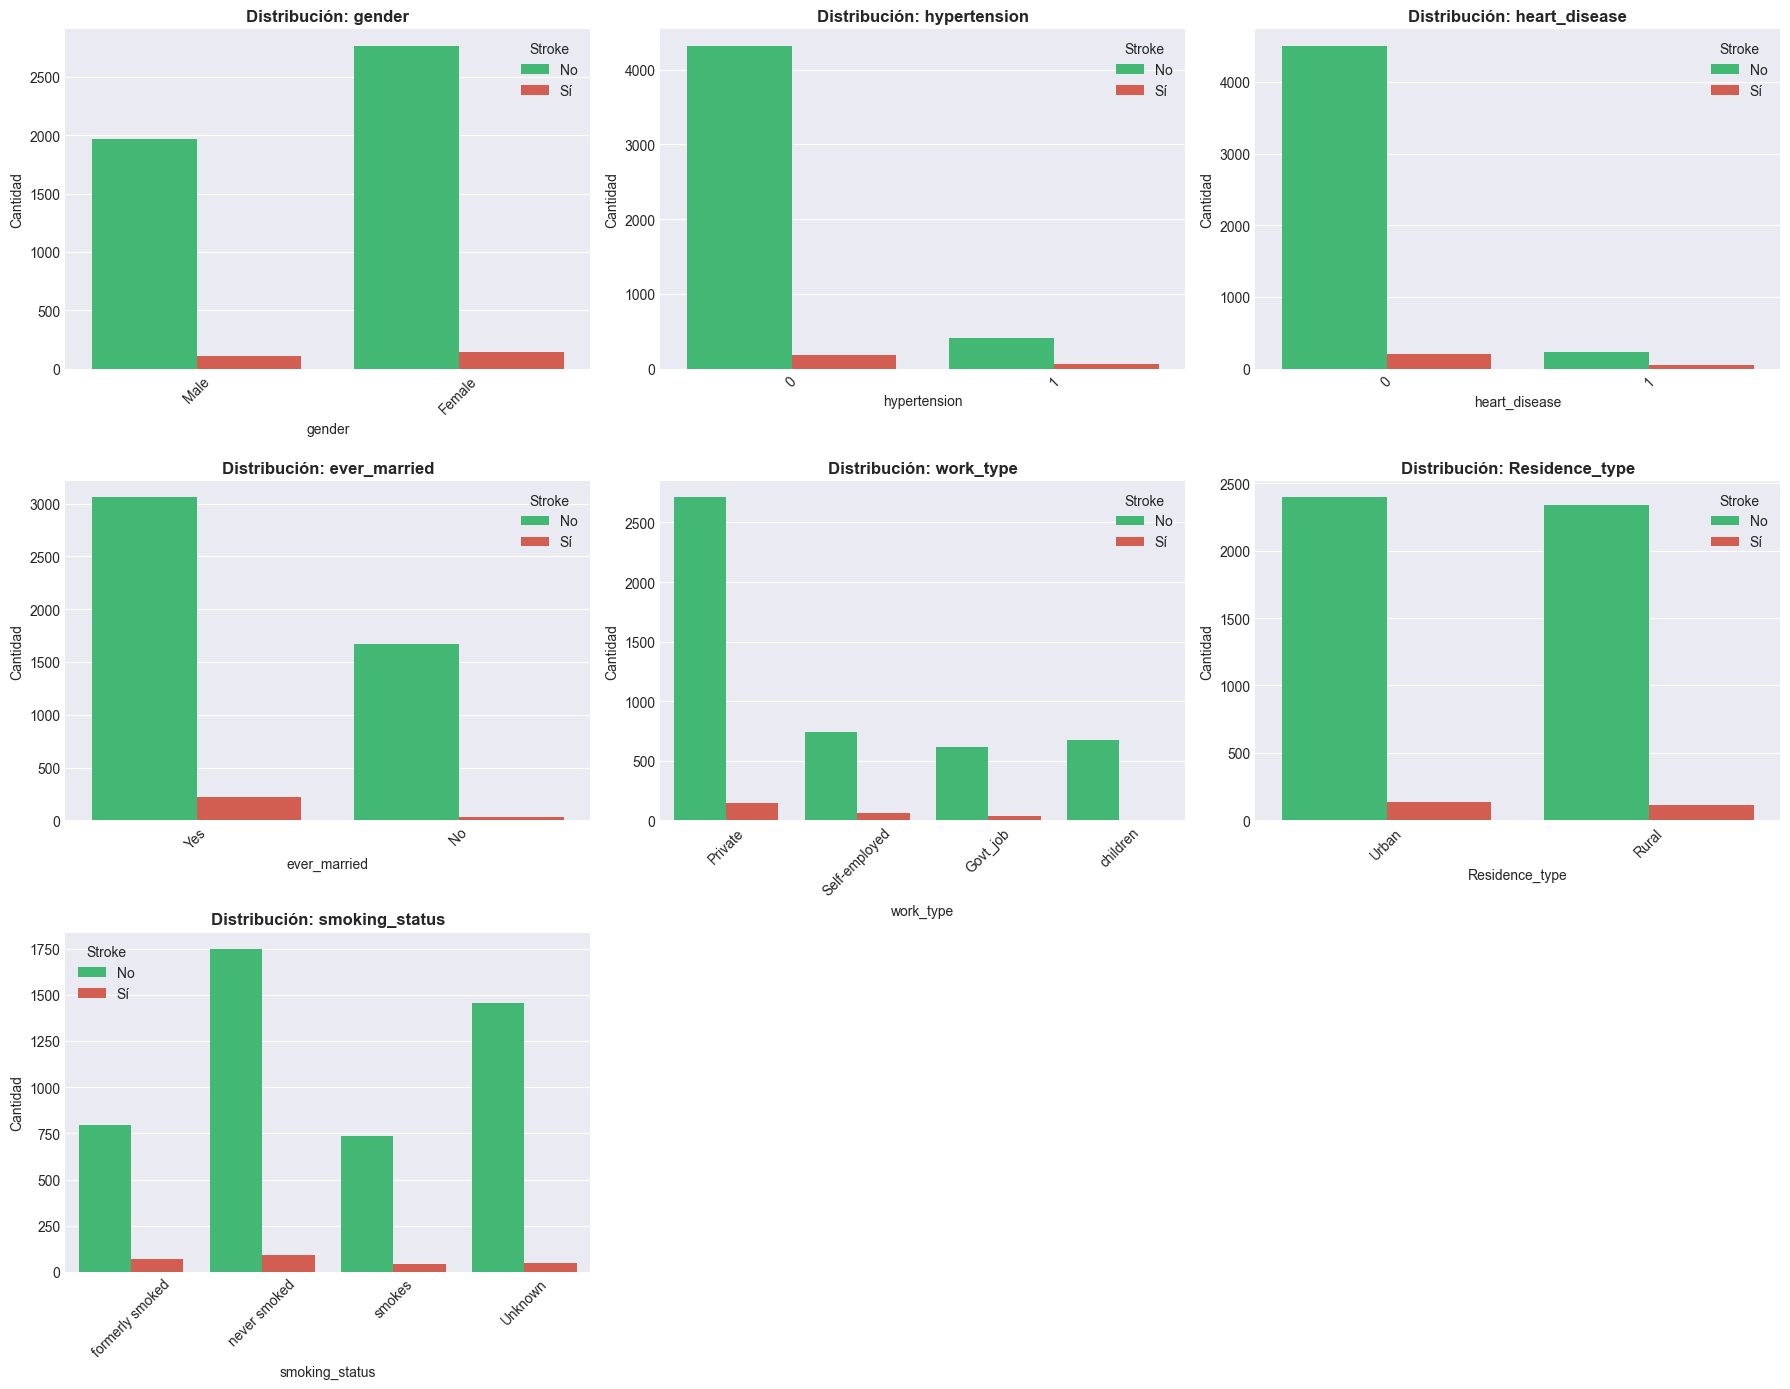

📊 TABLAS DE CONTINGENCIA - RELACIÓN CON STROKE

🔹 GENDER:
        Sin Ictus (%)  Con Ictus (%)
gender                              
Female          95.18           4.82
Male            94.79           5.21
------------------------------------------------------------

🔹 HYPERTENSION:
              Sin Ictus (%)  Con Ictus (%)
hypertension                              
0                     95.96           4.04
1                     86.22          13.78
------------------------------------------------------------

🔹 HEART_DISEASE:
               Sin Ictus (%)  Con Ictus (%)
heart_disease                              
0                      95.73           4.27
1                      82.91          17.09
------------------------------------------------------------

🔹 EVER_MARRIED:
              Sin Ictus (%)  Con Ictus (%)
ever_married                              
No                    98.30           1.70
Yes                   93.32           6.68
---------------------------------------

In [7]:
# Análisis de variables categóricas
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                        'work_type', 'Residence_type', 'smoking_status']

# Crear subplots para todas las variables categóricas
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    # Conteo por categoría
    sns.countplot(data=df, x=feature, hue='stroke', palette=['#2ecc71', '#e74c3c'], ax=axes[idx])
    axes[idx].set_title(f'Distribución: {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Cantidad')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(title='Stroke', labels=['No', 'Sí'])

# Ocultar los ejes no utilizados
for idx in range(len(categorical_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Tabla de contingencia para cada variable categórica
print("=" * 80)
print("📊 TABLAS DE CONTINGENCIA - RELACIÓN CON STROKE")
print("=" * 80)

for feature in categorical_features:
    print(f"\n🔹 {feature.upper()}:")
    crosstab = pd.crosstab(df[feature], df['stroke'], normalize='index') * 100
    crosstab.columns = ['Sin Ictus (%)', 'Con Ictus (%)']
    print(crosstab.round(2))
    print("-" * 60)

## 7️⃣ Análisis de Variables Numéricas

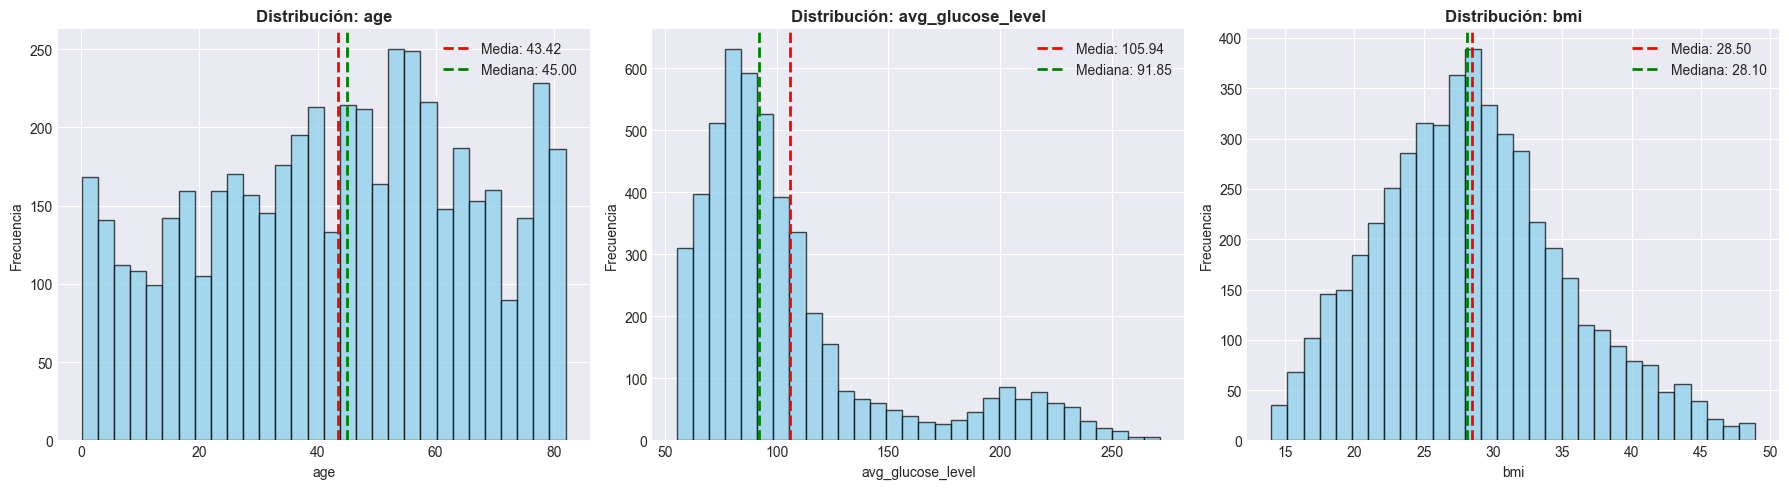

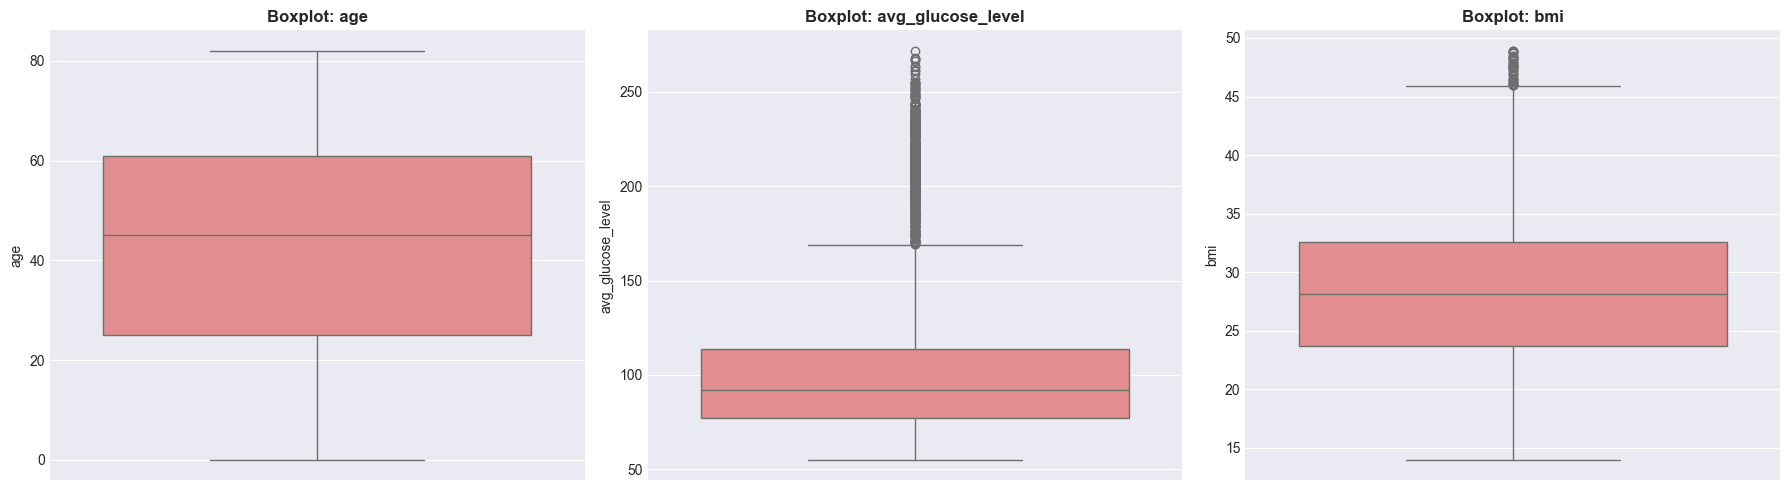

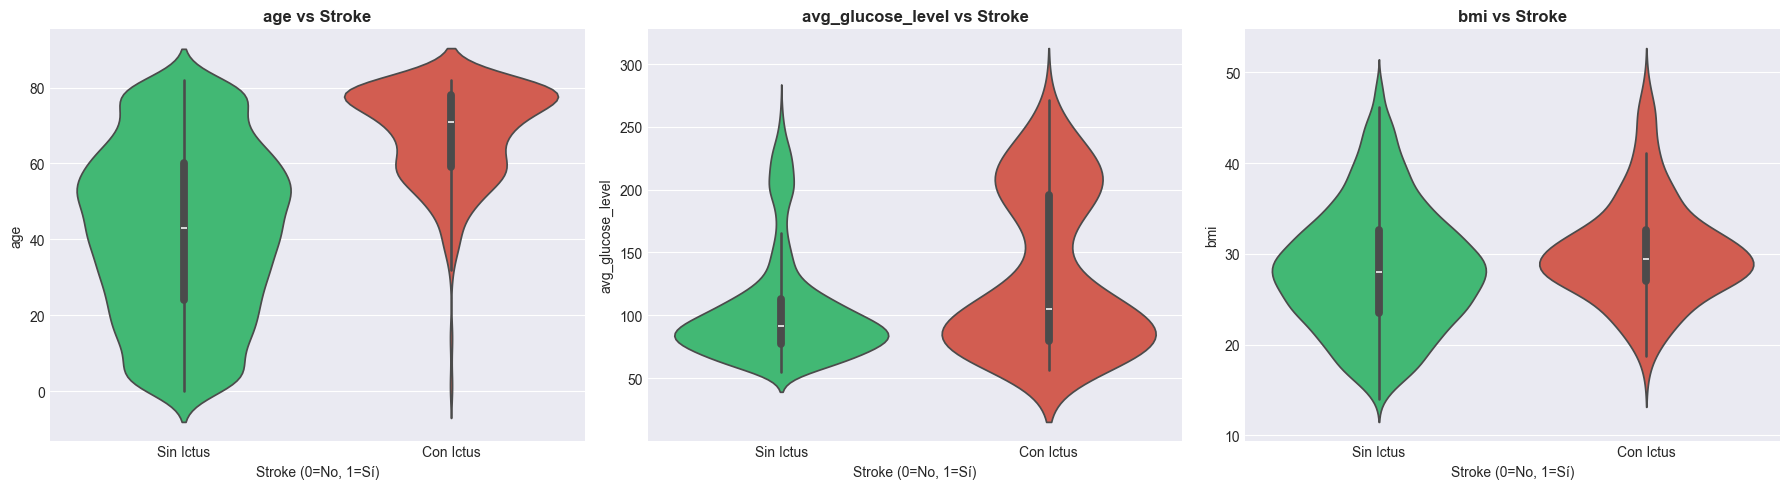

📊 ESTADÍSTICAS NUMÉRICAS POR GRUPO DE STROKE

🔹 AGE:
            count   mean    std   min   25%   50%   75%   max
Sin Ictus  4733.0  42.14  22.35  0.08  24.0  43.0  60.0  82.0
Con Ictus   248.0  67.82  12.67  1.32  59.0  71.0  78.0  82.0
--------------------------------------------------------------------------------

🔹 AVG_GLUCOSE_LEVEL:
            count    mean    std    min    25%     50%     75%     max
Sin Ictus  4733.0  104.57  43.60  55.12  77.12   91.45  112.62  267.76
Con Ictus   248.0  132.18  61.77  56.11  79.57  105.04  195.96  271.74
--------------------------------------------------------------------------------

🔹 BMI:
            count   mean   std   min    25%    50%    75%   max
Sin Ictus  4733.0  28.41  6.83  14.0  23.50  28.00  32.60  48.9
Con Ictus   248.0  30.19  5.66  16.9  26.98  29.45  32.65  48.9
--------------------------------------------------------------------------------


In [8]:
# Análisis de variables numéricas
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Histogramas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(numerical_features):
    axes[idx].hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribución: {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df[feature].mean():.2f}')
    axes[idx].axvline(df[feature].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df[feature].median():.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Boxplots para detectar outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(numerical_features):
    sns.boxplot(data=df, y=feature, color='lightcoral', ax=axes[idx])
    axes[idx].set_title(f'Boxplot: {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Violin plots por stroke
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(numerical_features):
    sns.violinplot(data=df, x='stroke', y=feature, palette=['#2ecc71', '#e74c3c'], ax=axes[idx])
    axes[idx].set_title(f'{feature} vs Stroke', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Stroke (0=No, 1=Sí)')
    axes[idx].set_ylabel(feature)
    axes[idx].set_xticklabels(['Sin Ictus', 'Con Ictus'])

plt.tight_layout()
plt.show()

# Estadísticas por grupo de stroke
print("=" * 80)
print("📊 ESTADÍSTICAS NUMÉRICAS POR GRUPO DE STROKE")
print("=" * 80)

for feature in numerical_features:
    print(f"\n🔹 {feature.upper()}:")
    stats = df.groupby('stroke')[feature].describe().round(2)
    stats.index = ['Sin Ictus', 'Con Ictus']
    print(stats)
    print("-" * 80)

## 8️⃣ Análisis de Correlaciones

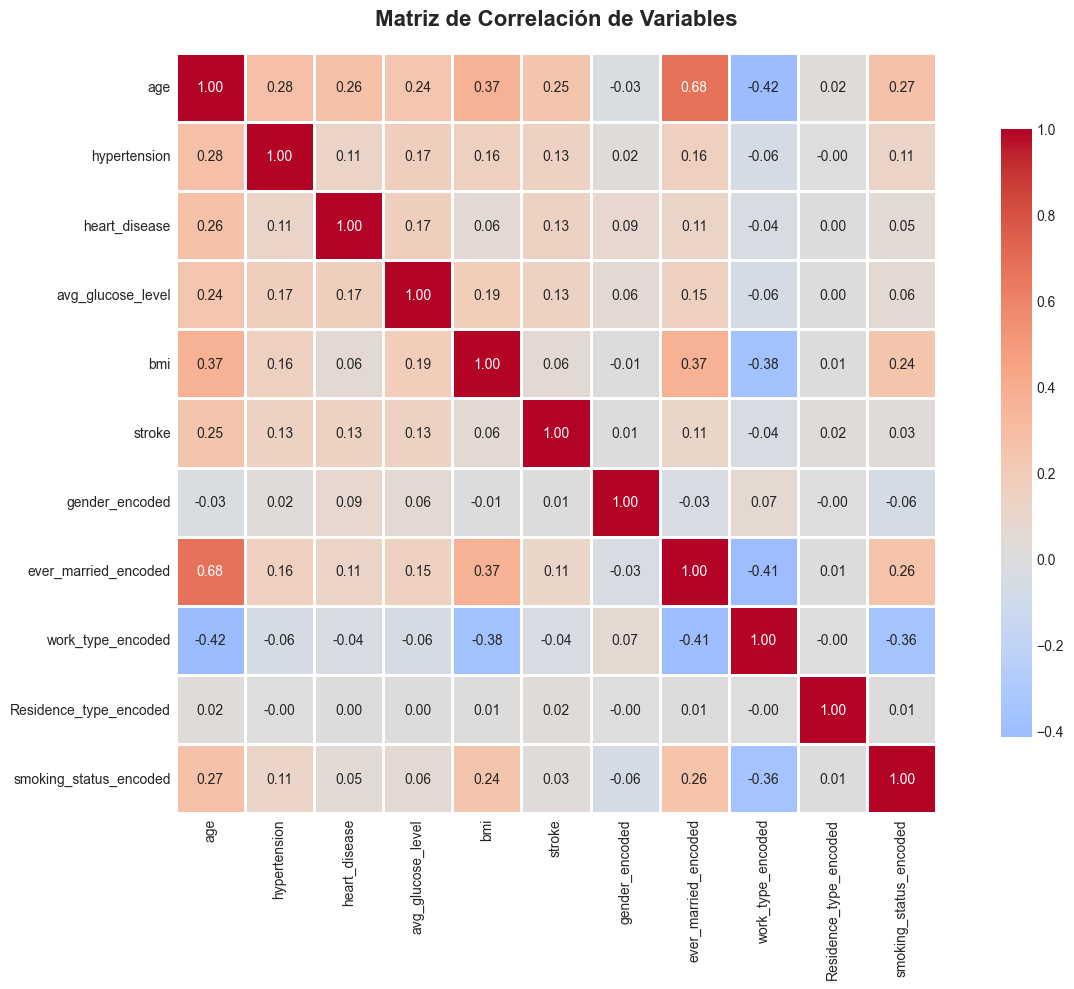

🎯 CORRELACIÓN CON LA VARIABLE OBJETIVO (STROKE)

📊 Variables ordenadas por correlación con Stroke:

stroke                    1.000000
age                       0.246478
heart_disease             0.134610
avg_glucose_level         0.133227
hypertension              0.131965
ever_married_encoded      0.108398
bmi                       0.056926
smoking_status_encoded    0.027463
Residence_type_encoded    0.016494
gender_encoded            0.008870
work_type_encoded        -0.041835
Name: stroke, dtype: float64


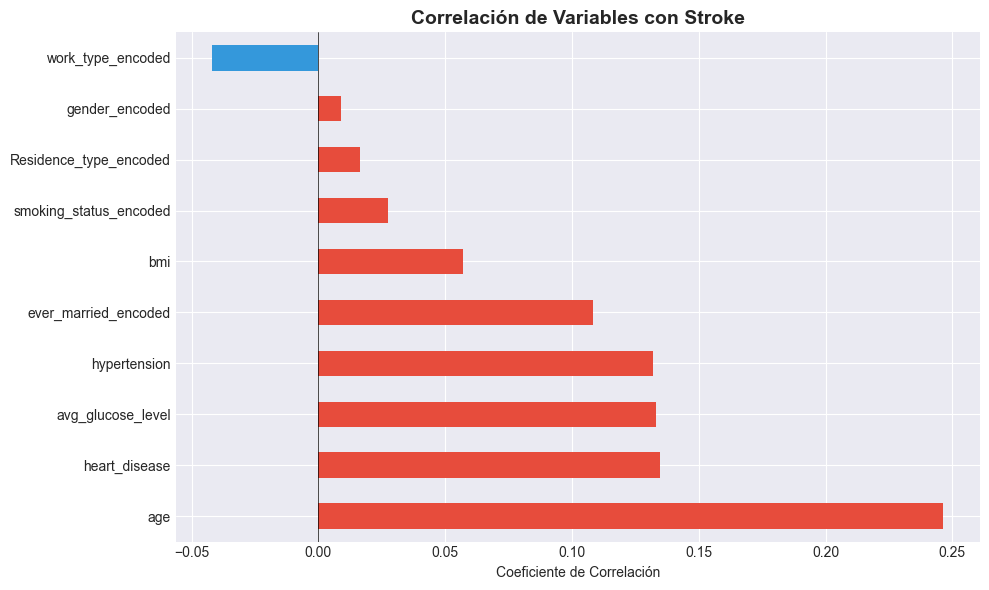

In [9]:
# Crear una copia del dataframe para análisis de correlación
df_corr = df.copy()

# Codificar variables categóricas para correlación
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_for_corr = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_for_corr:
    df_corr[col + '_encoded'] = le.fit_transform(df_corr[col].astype(str))

# Seleccionar columnas numéricas y codificadas para correlación
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
encoded_cols = [col + '_encoded' for col in categorical_for_corr]
corr_cols = numeric_cols + encoded_cols

# Manejar valores nulos en bmi
df_corr['bmi'] = df_corr['bmi'].fillna(df_corr['bmi'].median())

# Calcular matriz de correlación
correlation_matrix = df_corr[corr_cols].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación de Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlación con la variable objetivo
print("=" * 80)
print("🎯 CORRELACIÓN CON LA VARIABLE OBJETIVO (STROKE)")
print("=" * 80)

stroke_correlation = correlation_matrix['stroke'].sort_values(ascending=False)
print("\n📊 Variables ordenadas por correlación con Stroke:\n")
print(stroke_correlation)

# Visualizar correlación con stroke
plt.figure(figsize=(10, 6))
stroke_corr_plot = stroke_correlation.drop('stroke')
colors = ['#e74c3c' if x > 0 else '#3498db' for x in stroke_corr_plot.values]
stroke_corr_plot.plot(kind='barh', color=colors)
plt.title('Correlación de Variables con Stroke', fontsize=14, fontweight='bold')
plt.xlabel('Coeficiente de Correlación')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

## 🔍 CONCLUSIONES DEL EDA - RESUMEN EJECUTIVO

---

### ✅ ESTADO DEL DATASET

#### 📊 Calidad de Datos: EXCELENTE
- ✅ **4,981 registros** válidos
- ✅ **0 valores nulos** (100% completo)
- ✅ **0 duplicados**
- ✅ **11 variables** bien estructuradas
- ✅ Datos consistentes y lógicos

---

### 🎯 TOP 5 VARIABLES PREDICTORAS (por correlación con stroke)

| Rank | Variable | Correlación | Insight Clave |
|------|----------|-------------|---------------|
| 🥇 | **age** | 0.246 | Edad promedio con stroke: **67.8 años** vs sin stroke: **42.1 años** |
| 🥈 | **heart_disease** | 0.135 | Con enfermedad cardíaca: **17.09%** stroke vs **4.27%** sin ella |
| 🥉 | **avg_glucose_level** | 0.133 | Con stroke: **132 mg/dL** vs sin stroke: **104 mg/dL** |
| 4️⃣ | **hypertension** | 0.132 | Con hipertensión: **13.78%** stroke vs **4.04%** sin ella |
| 5️⃣ | **ever_married** | 0.108 | Casados: **6.68%** stroke vs solteros: **1.70%** (proxy de edad) |

---

### ⚠️ PROBLEMA CRÍTICO: DESBALANCEO SEVERO

```
Sin Stroke (0): 4,733 casos (95.02%) ████████████████████
Con Stroke (1):   248 casos ( 4.98%) █
```

**Ratio de desbalanceo: 19:1**

#### Implicaciones:
- ❌ **Accuracy NO es métrica válida** (modelo naive = 95% accuracy)
- ✅ Usar **Recall, F1-Score, AUC-ROC**
- 🔧 **OBLIGATORIO aplicar técnicas de balanceo:**
  - SMOTE (Synthetic Minority Over-sampling)
  - Class weights en modelos
  - Ensemble balanceado
  - Undersampling (no recomendado)

---

### 📈 VARIABLES CON CORRELACIÓN BAJA/NULA (considerar eliminar)

| Variable | Correlación | Conclusión |
|----------|-------------|------------|
| **gender** | 0.009 | ❌ Prácticamente sin correlación - **ELIMINAR** |
| **Residence_type** | 0.016 | ❌ Sin correlación - **ELIMINAR** |
| **smoking_status** | 0.027 | ⚠️ Muy baja - mantener pero reevaluar |
| **work_type** | -0.042 | ⚠️ Baja - probablemente proxy de edad |

---

### 🛠️ FEATURE ENGINEERING RECOMENDADO

#### Crear Variables Categóricas:
1. **`age_group`**: <18, 18-40, 40-60, >60
2. **`glucose_category`**: Normal (<100), Prediabetes (100-125), Diabetes (>125)
3. **`bmi_category`**: Bajo peso, Normal, Sobrepeso, Obesidad
4. **`has_smoked`**: Binaria (fumó alguna vez: sí/no)

#### Crear Variables de Interacción:
5. **`age × hypertension`**
6. **`age × heart_disease`**
7. **`glucose × bmi`**

#### Crear Risk Score Compuesto:
8. **`risk_score`** = weighted sum de variables principales

---

### 📊 ESTADÍSTICAS CLAVE

#### Pacientes CON Stroke:
- 👤 Edad: **67.8 ± 12.7 años** (mediana: 71)
- 🍬 Glucosa: **132.2 ± 61.8 mg/dL**
- ⚖️ BMI: **30.2 ± 5.7** (obesidad leve)
- 💔 Enfermedad cardíaca: **17.09%** de casos
- 💉 Hipertensión: **13.78%** de casos

#### Pacientes SIN Stroke:
- 👤 Edad: **42.1 ± 22.4 años** (mediana: 43)
- 🍬 Glucosa: **104.6 ± 43.6 mg/dL**
- ⚖️ BMI: **28.4 ± 6.8** (sobrepeso)
- 💔 Enfermedad cardíaca: **4.27%** de casos
- 💉 Hipertensión: **4.04%** de casos

---

### 🎯 MÉTRICAS DE EVALUACIÓN APROPIADAS

#### ❌ NO USAR:
- **Accuracy** (sesgada por desbalanceo)

#### ✅ USAR (en orden de prioridad):

1. **RECALL (Sensibilidad)** - MÉTRICA PRINCIPAL
   - Objetivo: **> 0.80**
   - Minimizar Falsos Negativos (pacientes con riesgo no detectados)

2. **F1-Score** - Balance Precision/Recall
   - Objetivo: **> 0.70**

3. **AUC-ROC** - Discriminación entre clases
   - Objetivo: **> 0.85**

4. **Precision-Recall Curve** - Para datos desbalanceados

5. **Matriz de Confusión** - Análisis de errores

**Justificación Médica:**
- 🚨 **Falso Negativo** (no detectar riesgo) = **CRÍTICO** → paciente en riesgo sin tratamiento
- ⚠️ **Falso Positivo** (detectar riesgo inexistente) = Aceptable → examen adicional preventivo

---

### 🔬 ESTRATEGIA DE MODELADO PROPUESTA

#### Fase 1: Baseline (Referencia)
- Logistic Regression + class_weight
- **Objetivo:** F1 > 0.40

#### Fase 2: ML Clásico
- Random Forest + class_weight
- XGBoost + scale_pos_weight
- LightGBM + is_unbalance
- **Objetivo:** F1 > 0.60

#### Fase 3: Balanceo SMOTE
- Aplicar SMOTE al training set
- Re-entrenar mejores modelos
- **Objetivo:** F1 > 0.70, Recall > 0.80

#### Fase 4: Hyperparameter Tuning
- Optuna para optimización automática
- **Objetivo:** F1 > 0.75, Recall > 0.85

#### Fase 5: Deep Learning
- Neural Networks fully connected
- CNN para datos tabulares
- **Objetivo:** Comparar con ML clásico

#### Fase 6: Ensemble
- Voting Classifier
- Stacking
- **Objetivo:** F1 > 0.80, Recall > 0.85

---

### 🚀 PRÓXIMOS PASOS INMEDIATOS

#### ✅ COMPLETADO:
- [x] EDA exhaustivo
- [x] Identificación de variables clave
- [x] Análisis de correlaciones
- [x] Detección de desbalanceo
- [x] Definición de estrategia

#### 🔄 SIGUIENTE FASE: Preprocesamiento
1. [ ] Split Train/Validation/Test (estratificado)
2. [ ] Normalización de variables numéricas (StandardScaler)
3. [ ] Encoding de variables categóricas (One-Hot)
4. [ ] Feature engineering (crear nuevas variables)
5. [ ] Aplicar SMOTE al training set
6. [ ] Calcular class_weights
7. [ ] Guardar preprocesadores

#### 📋 FASES POSTERIORES:
- [ ] Fase 3: Modelado ML Clásico
- [ ] Fase 4: Deep Learning (CNN)
- [ ] Fase 5: Evaluación y Comparación
- [ ] Fase 6: Aplicación CLI
- [ ] Fase 7: Productivización (Streamlit/API)
- [ ] Fase 8: Dockerización
- [ ] Fase 9: Tests Unitarios
- [ ] Fase 10: Despliegue
- [ ] Fase 11: CNN para Imágenes CT (Bonus)

---

### 📚 RECURSOS GENERADOS

1. ✅ **`stroke_eda_complete.ipynb`** - Notebook con EDA completo
2. ✅ **`context.md`** - Estado del proyecto y roadmap
3. ✅ **`EDA_INSIGHTS.md`** - Insights detallados y hallazgos

---

### 💡 RECOMENDACIONES FINALES

1. **Priorizar RECALL** sobre precision (contexto médico)
2. **Eliminar gender y Residence_type** (no aportan información)
3. **Feature engineering** es crítico para mejorar performance
4. **SMOTE + Class Weights** combinados para mejor balanceo
5. **Cross-validation estratificada** obligatoria
6. **MLFlow** para tracking de experimentos desde el inicio
7. **Documentar decisiones** y justificaciones
8. **Validar con expertos médicos** si es posible

---

### 🎯 PREDICCIÓN DE RESULTADOS

| Escenario | F1-Score | Recall | AUC-ROC | Viabilidad |
|-----------|----------|--------|---------|------------|
| **Baseline** | 0.40 | 0.50 | 0.70 | ✅ Esperable |
| **Optimizado** | 0.70 | 0.80 | 0.85 | ✅ Alcanzable |
| **Mejor caso** | 0.80 | 0.85 | 0.90 | ⚠️ Optimista |

---

## ✅ EDA COMPLETADO - LISTO PARA PREPROCESAMIENTO

**Fecha:** 5 de noviembre de 2025  
**Ultra-Think Mode:** ✅ ENABLED  
**Modo Ingeniero:** ✅ ENABLED  

---

*Para más detalles, consultar `EDA_INSIGHTS.md` y `context.md`*